<a href="https://colab.research.google.com/github/lakshmansamvith/Coursera-Data-Visualization/blob/master/Coursera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import Dataset 

In [0]:
import pandas as pd 
import numpy as np 
coursera_df = pd.read_csv('/content/drive/My Drive/coursea_data.csv')


#Check for Null Values 

In [130]:
coursera_df.isnull().any()

Unnamed: 0                  False
course_title                False
course_organization         False
course_Certificate_type     False
course_rating               False
course_difficulty           False
course_students_enrolled    False
dtype: bool

#Checking for Categorical Values and Removing Unecessary Columns

In [131]:
categorical_values = (coursera_df.dtypes == 'Object')
unique_variables = [col for col in coursera_df.columns if len(coursera_df[col].unique())<50]
print(unique_variables)
coursera_df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
coursera_df

['course_Certificate_type', 'course_rating', 'course_difficulty']


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k
...,...,...,...,...,...,...
886,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52k
887,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21k
888,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30k
889,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.8k


#Converting Course_students_enrolled into a numeric value

In [0]:
import re
students_enrolled = coursera_df['course_students_enrolled'].copy()
for ind, val in enumerate(students_enrolled):
    if re.search('m$', students_enrolled[ind]):
       students_enrolled[ind] = students_enrolled[ind].replace('m', '')
       students_enrolled[ind] = str(float(students_enrolled[ind].replace('.', ''))*100)  
    elif re.match('.\.', students_enrolled[ind] ):
       students_enrolled[ind] = students_enrolled[ind].replace('k', '0')
    else: 
       students_enrolled[ind] = students_enrolled[ind].replace('k', '.0')    

student_enrolled_values = [int((float(val)*1000)) for val in students_enrolled]
coursera_df['course_students_enrolled'] = student_enrolled_values

#Plotting Bar Graph For Top 5 Courses By No of Course Students Enrolled 

> Indented block



Text(0, 0.5, 'Number of students enrolled in millions')

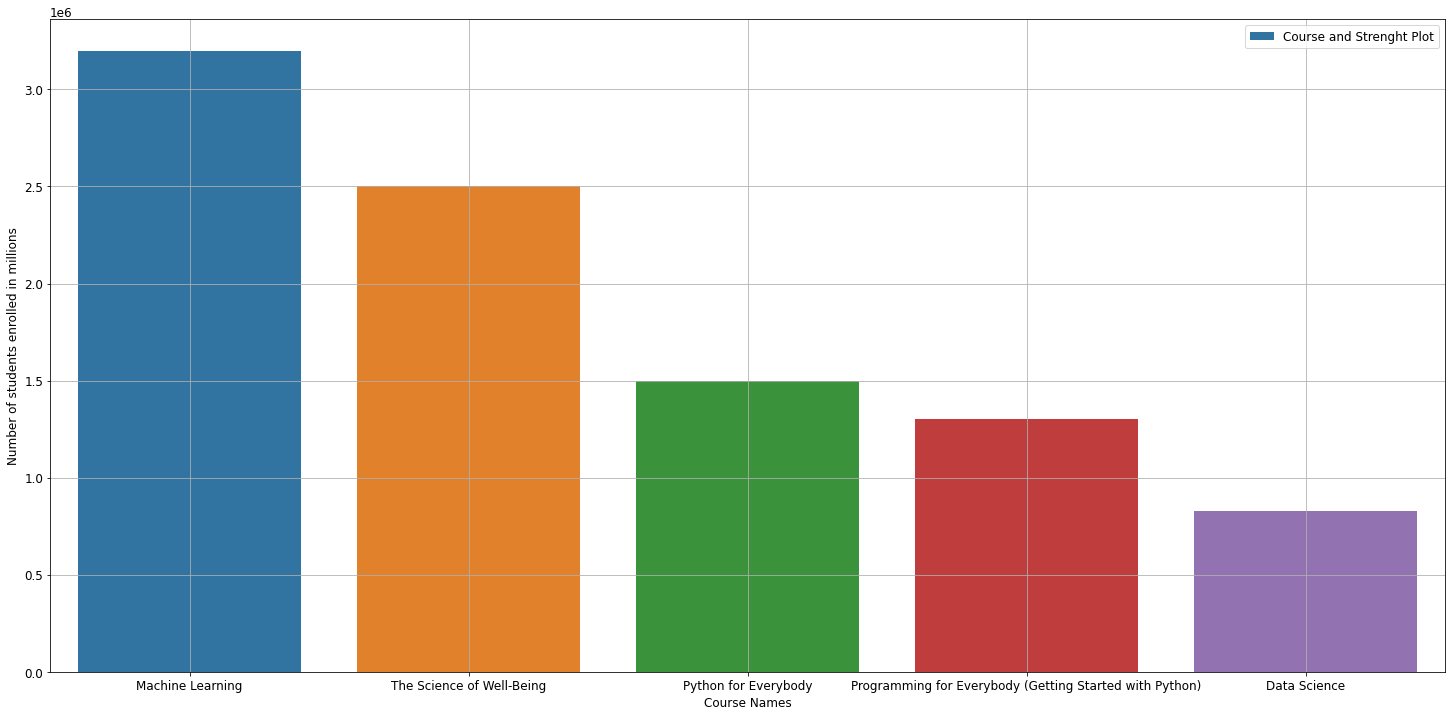

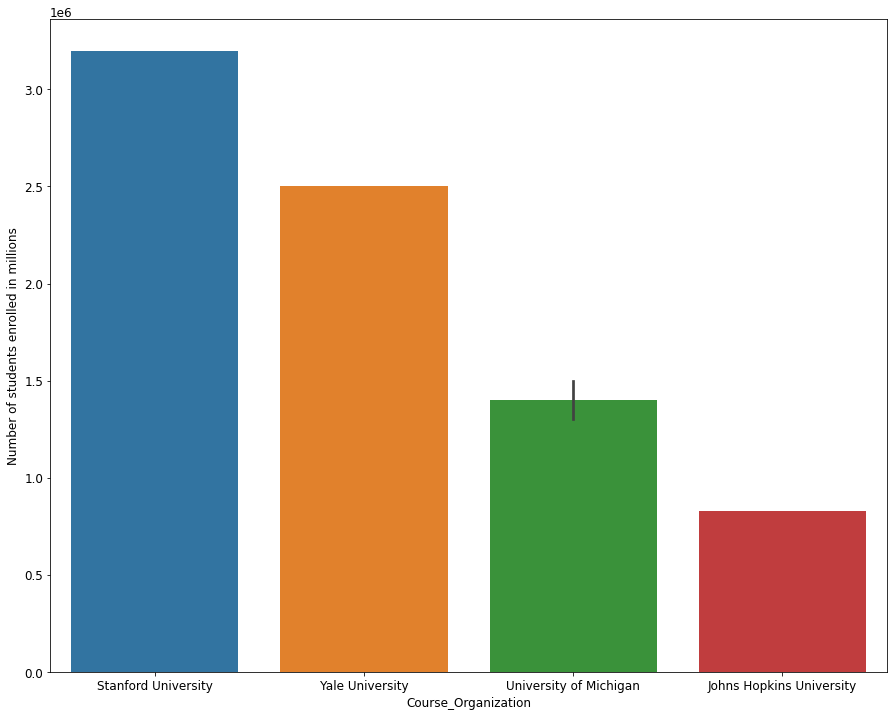

In [313]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(25, 12))
copy_df = coursera_df.sort_values(by=['course_students_enrolled'], ascending=False)
sns.barplot(x=copy_df['course_title'].iloc[:5], y=copy_df['course_students_enrolled'].iloc[:5], label='Course and Strenght Plot')
plt.grid()
plt.xlabel('Course Names')
plt.ylabel('Number of students enrolled in millions')
plt.legend()
plt.figure(figsize=(15, 12))
sns.barplot(x=copy_df['course_organization'].iloc[:5], y=copy_df['course_students_enrolled'].iloc[:5], label='Course Organization')
plt.xlabel('Course_Organization')
plt.ylabel('Number of students enrolled in millions')


#Countplot for Courses of different ratings

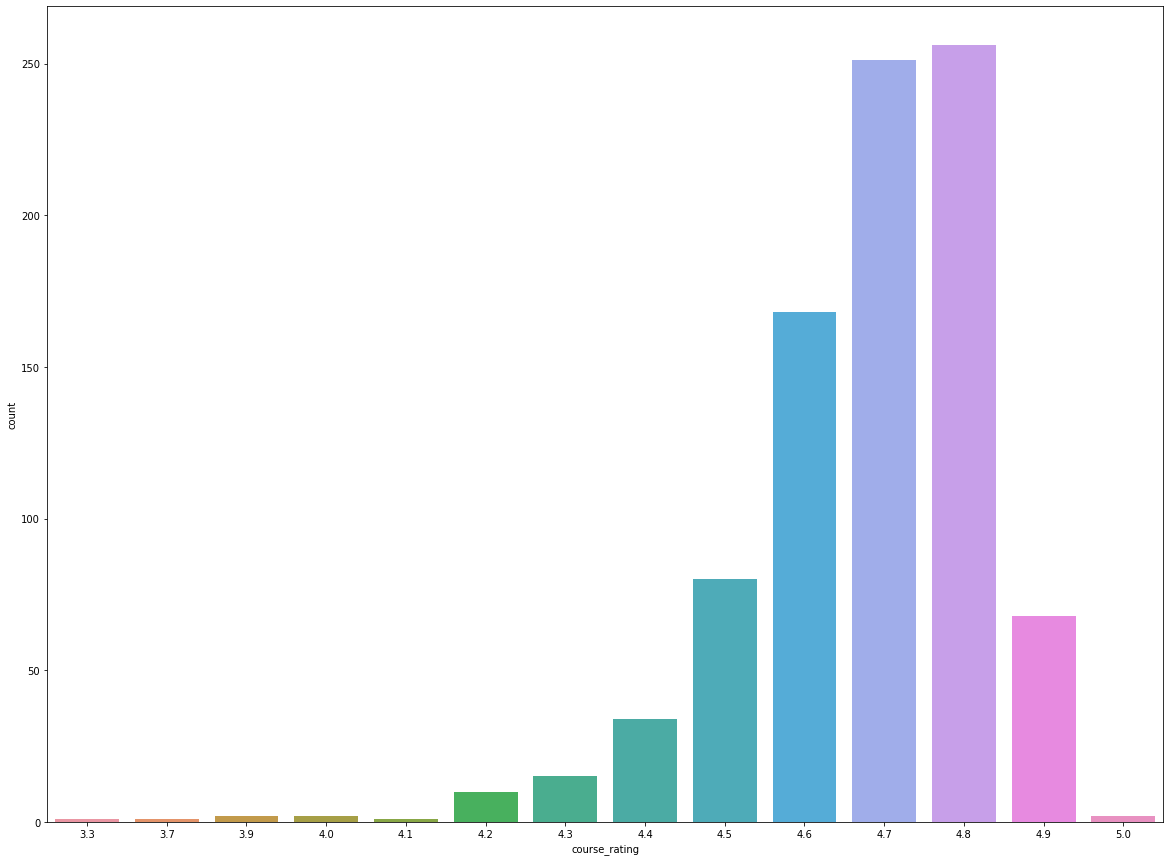

In [202]:
copy_df = copy_df.sort_values(by=['course_rating'], ascending=False)
plt.figure(figsize=(20,15))
sns.countplot('course_rating', data=copy_df,)

# PieChart for percentage of courses according to course_difficulty

([<matplotlib.patches.Wedge at 0x7f961b990160>,
 [Text(-0.17496468706328222, 1.1871762119756477, 'Beginner'),
  Text(-0.6028389242249427, -0.9201006637533276, 'Intermediate'),
  Text(0.7716220765750056, -0.7839638836975057, 'Mixed'),
  Text(1.0975324971837646, -0.07363706692671843, 'Advanced')],
 [Text(-0.10206273412024795, 0.6925194569857944, '54.66%'),
  Text(-0.32882123139542324, -0.5018730893199969, '22.22%'),
  Text(0.4208847690409121, -0.4276166638350031, '20.99%'),
  Text(0.5986540893729625, -0.04016567286911914, '2.13%')])

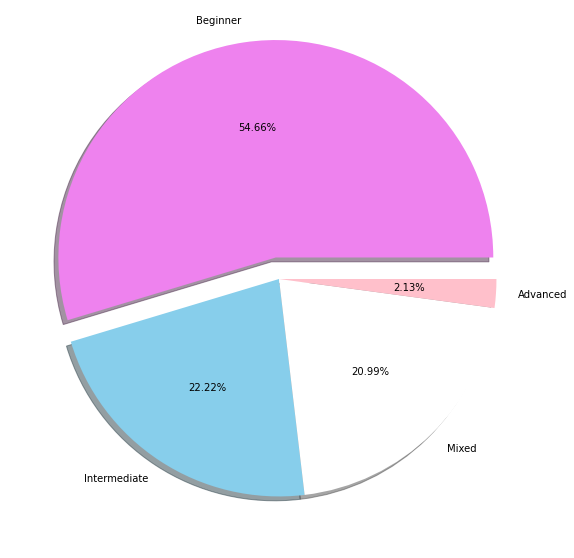

In [238]:
course_difficulties = list(copy_df['course_difficulty'].unique())
ratios = list((copy_df['course_difficulty'].value_counts()/len(copy_df))*100)
explode=(0.1, 0, 0, 0)
colors = ['violet', 'skyblue', 'white', 'pink']
plt.figure(figsize=(10, 10))
plt.pie(ratios, explode=explode, labels=course_difficulties, shadow=True, autopct='%1.2f%%', colors=colors)

#PieChart for % of Course_Certification_Types

([<matplotlib.patches.Wedge at 0x7f961b795668>,
 [Text(-0.5092129716298796, 0.9750395630557088, 'COURSE'),
  Text(0.46751440573749703, -0.9957059206552481, 'SPECIALIZATION'),
  Text(1.0990155035933216, -0.04652873157005316, 'PROFESSIONAL CERTIFICATE')],
 [Text(-0.27775252997993427, 0.5318397616667502, '65.32%'),
  Text(0.25500785767499834, -0.543112320357408, '33.33%'),
  Text(0.5994630019599935, -0.025379308129119902, '1.35%')])

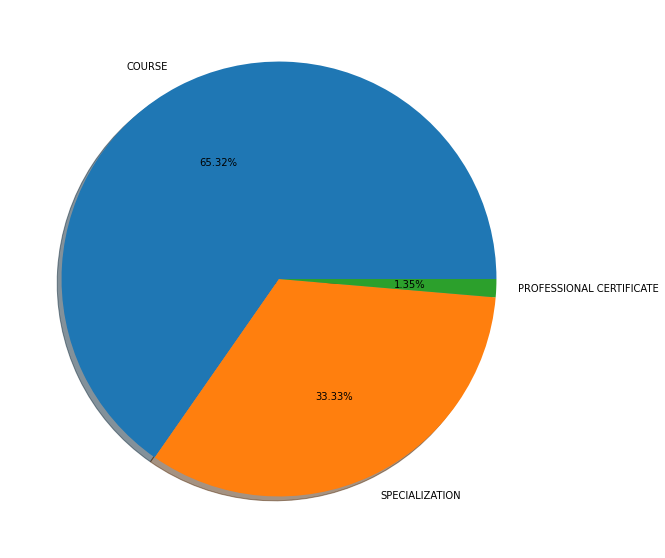

In [243]:
course_types = list(copy_df['course_Certificate_type'].unique())
ratios = list((copy_df['course_Certificate_type'].value_counts()/len(copy_df))*100)
plt.figure(figsize=(10, 10))
plt.pie(ratios,  labels=course_types, shadow=True, autopct='%1.2f%%', )

#Finding Courses Related to Python, Data Science

In [272]:
python_courses = [ val for val in copy_df['course_title']  if re.search('.Python' , val)]
data_science_courses = [ val for val in copy_df['course_title']  if re.search('.Data.Science' , val)]

[]

#Barplot for showing Top 5 Institutes which provide most of the courses on Coursera 

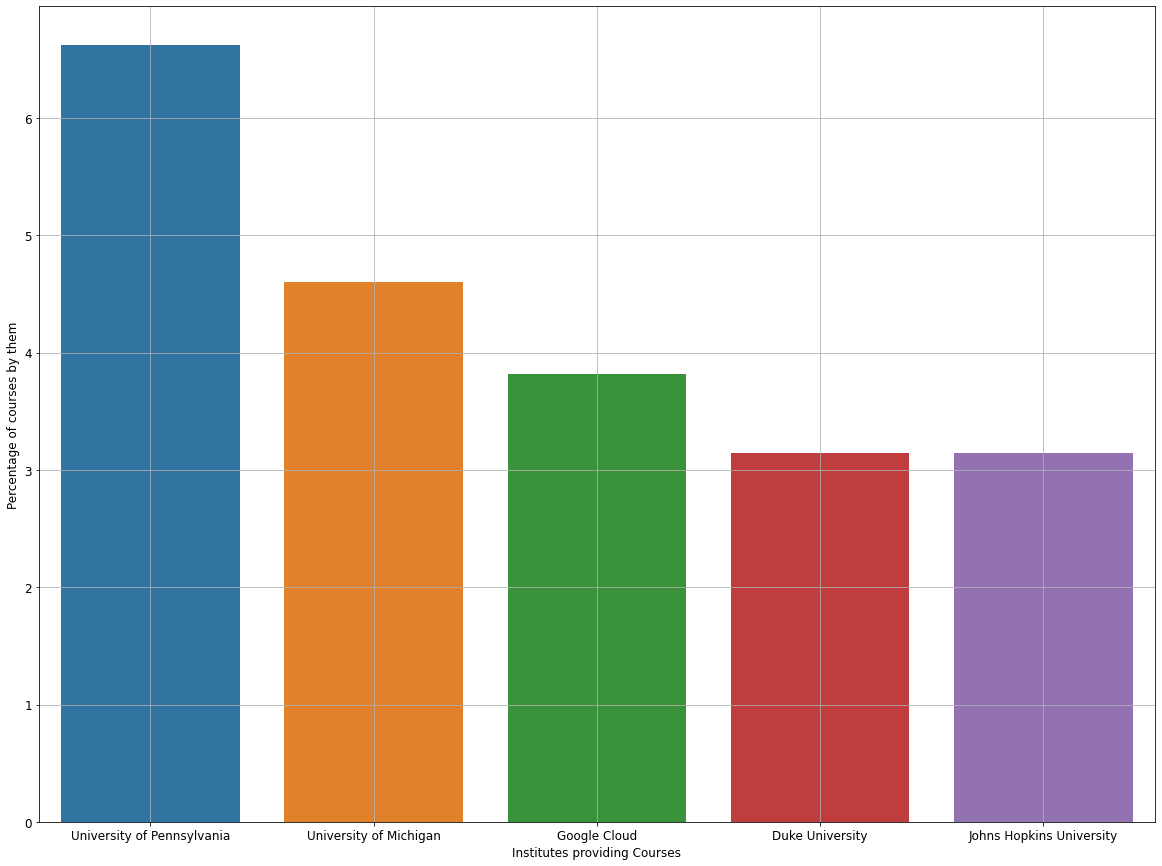

In [311]:
count_values = copy_df['course_organization'].value_counts()[:5]
unique_organizations = count_values.index
percentages = [((val/len(copy_df))*100) for val in count_values]
percentages
plt.figure(figsize=(20, 15))
plt.rcParams.update({'font.size': 12})
sns.barplot(x=unique_organizations, y=percentages, label='Top 5 Courses Providing Institutes')
plt.xlabel("Institutes providing Courses")
plt.ylabel("Percentage of courses by them")
plt.grid()